<a href="https://colab.research.google.com/github/KhalinaA/Digital_Image_Processing/blob/main/PR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imageai numpy opencv-python torchvision matplotlib torch

  Using cached imageai-3.0.3-py3-none-any.whl (69 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached torchvision-0.16.2-cp311-cp311-win_amd64.whl (1.1 MB)
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached torch-2.1.2-cp311-cp311-win_amd64.whl (192.3 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached fsspec-2023.12.2-py3-none-any.whl (168 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Добавляем в проект исходное изображение:

In [3]:
import numpy as np
import cv2
from urllib.request import urlopen

req = urlopen('https://img.youscreen.ru/wall/14977257054998/14977257054998_1920x1200.jpg')

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8)
image_2 = cv2.imdecode(image_2, -1)

cv2.imshow('', image_2)
cv2.waitKey()

-1

# Пример №1. Детекция

[Техническая документация](https://imageai.readthedocs.io/en/latest/detection/index.html)

In [4]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsRetinaNet() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("./retinanet.pth") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

image_path = os.path.join(exec_path, "new_objects.jpg")

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=image_path, # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread(image_path)
cv2.imshow('', output_image)
cv2.waitKey()

d:\Documents\code\univ\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Documents\code\univ\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
d:\Documents\code\univ\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
d:\Documents\code\univ\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The curren

[{'name': 'cat', 'percentage_probability': 87.99, 'box_points': [694, 479, 1705, 1116]}]


-1

# Пример №2. Классификация

[Техническая документация](https://imageai.readthedocs.io/en/latest/prediction/index.html)

In [5]:
from imageai.Classification import ImageClassification
import os

d:\Documents\code\univ\.venv\Lib\site-packages\torchvision\models\inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [7]:
execution_path = "resnet50.pth"

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath(execution_path)
prediction.loadModel()

predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

snow leopard  :  64.198
Arctic fox  :  12.8115
grey fox  :  5.4439
fox squirrel  :  2.533
cheetah  :  2.2291
cougar  :  2.1936
leopard  :  1.3278
lynx  :  1.2737
lion  :  0.9759
Egyptian cat  :  0.3976


# Задание №1. Детекция объектов на изображении

1.1. Перейдите по ссылке из примера №1

1.2. Загрузите готовую модель для детекции объектов на изображении, отличную от той, что представлена в примере

1.3. Используя данную модель, обработе 5 изображений с больши набором объектов, которые относятся к разным классам

1.4. Визуализируйте полученные результаты

Результаты для apples.png:
apple  :  99.94  :  [543, 328, 717, 518]
apple  :  99.97  :  [280, 327, 480, 535]
apple  :  99.71  :  [768, 320, 951, 515]
apple  :  99.8  :  [1252, 19, 1456, 228]
apple  :  99.98  :  [273, 22, 472, 235]
apple  :  99.11  :  [1258, 312, 1452, 527]
apple  :  99.73  :  [1001, 316, 1209, 531]
apple  :  99.92  :  [1006, 28, 1207, 227]
orange  :  90.74  :  [1266, 630, 1467, 832]
Результаты для cars.png:
handbag  :  63.19  :  [43, 124, 243, 225]
suitcase  :  86.09  :  [52, 122, 252, 229]
suitcase  :  70.59  :  [271, 135, 409, 231]
Результаты для knifes.png:
knife  :  100.0  :  [200, 10, 239, 160]
knife  :  99.97  :  [69, 0, 115, 154]
knife  :  100.0  :  [37, 5, 75, 142]
knife  :  99.99  :  [17, 22, 49, 125]
knife  :  100.0  :  [119, 4, 148, 148]
knife  :  100.0  :  [159, 11, 195, 142]
Результаты для people.png:
person  :  100.0  :  [617, 1163, 799, 1699]
person  :  99.97  :  [2308, 1177, 2469, 1704]
person  :  99.98  :  [938, 1207, 1092, 1737]
person  :  99.99  :  [

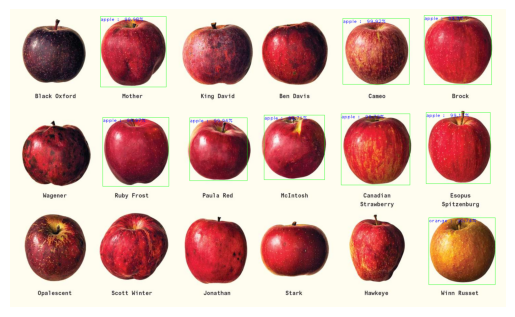

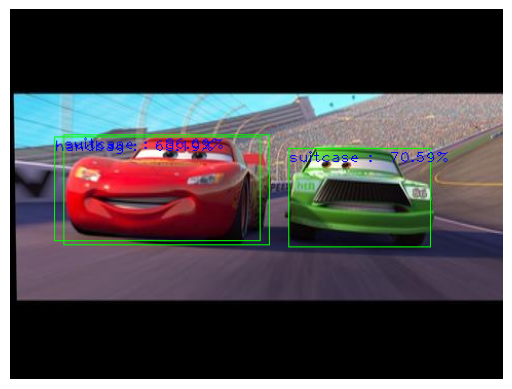

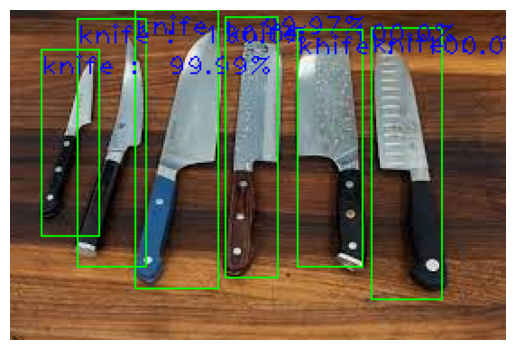

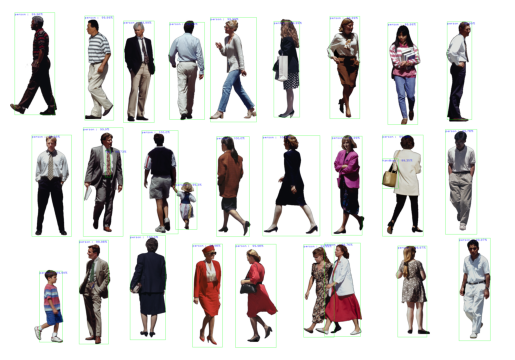

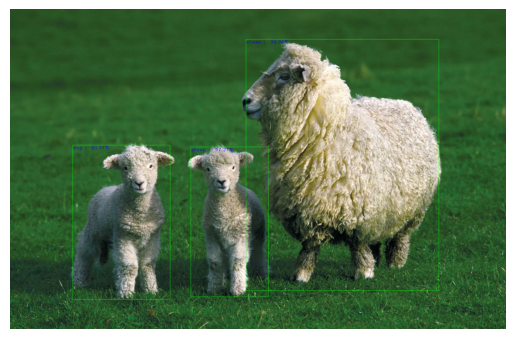

In [15]:
from imageai.Detection import ObjectDetection
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('yolov3.pt')
detector.loadModel()

new_image_directory = "./new_img/"
if (not os.path.isdir(new_image_directory)):
    os.mkdir(new_image_directory)
video_directory = "./img/"
video_file = [f for f in os.listdir(video_directory)]

for image_path in video_file:
    detections = detector.detectObjectsFromImage(input_image=video_directory+image_path, output_image_path=f"{new_image_directory}new_{image_path}")

    print(f"Результаты для {image_path}:")
    for detection in detections:
        print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])


for image_path in video_file:
    output_image_path = f"{new_image_directory}new_{image_path}"
    img = mpimg.imread(output_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()



# Задание №2. Классификация изображений

2.1. Перейдите по ссылке из примера №2

2.2. Загрузите готовую модель для классификации изображений, отличную от той, что представлена в примере

2.3. Используя данную модель, обработе 5 изображений, которые относятся к разным классам

2.4. Сохраните полученные предсказания используемой модели

In [11]:
from imageai.Classification import ImageClassification
import os

model_path = 'inception_v3.pth'

classifier = ImageClassification()
classifier.setModelTypeAsInceptionV3()
classifier.setModelPath(model_path)
classifier.loadModel()

video_directory = "./img/"
video_file = [video_directory + f for f in os.listdir(video_directory)]

predictions_list = []

for image_file in video_file:
    predictions, probabilities = classifier.classifyImage(image_file, result_count=1)
    prediction = {"image_file": image_file, "class": predictions[0], "probability": probabilities[0]}
    predictions_list.append(prediction)


with open("predictions.txt", 'w',  encoding="utf-8") as f:
    for prediction in predictions_list:
        print(f"Изображение: {prediction['image_file']}")
        print(f"Класс: {prediction['class']}")
        print(f"Вероятность: {prediction['probability']:.2%}")
        print()

        f.write(f"Изображение: {prediction['image_file']}\n")
        f.write(f"Класс: {prediction['class']}\n")
        f.write(f"Вероятность: {prediction['probability']:.2%}\n\n")

Изображение: ./img/apples.png
Класс: pomegranate
Вероятность: 2426.14%

Изображение: ./img/cars.png
Класс: sports car
Вероятность: 4929.72%

Изображение: ./img/knifes.png
Класс: cleaver
Вероятность: 9999.99%

Изображение: ./img/people.png
Класс: basketball
Вероятность: 4579.78%

Изображение: ./img/sheep.png
Класс: wire-haired fox terrier
Вероятность: 4231.59%



# Задание №3. Детекция и трекинг объектов на видеопотоке

## 3.1. Подготовка набора данных:

* Найдите и загрузите из сети Интернет 5 видеофайлов с большим количеством разнородных объектов в кадре (например запись с камеры видеонаблюдения на шоссе и тд) длительностью от 30 секунд до 1 минуты (Также Вы можете скачать видеофайл большей длительности, а затем обрезать его в одном из [онлйан-сервисов](https://online-video-cutter.com/ru/?ysclid=lfjb8zk8er484677266).


* Для более оптимальной работы с видеофайлами, сожмите их, используя онлайн-сервисы. ([Например тут](https://compress-video-online.com/ru/ ))

## 3.2. Детекция и трекинг объектов на видеопотоке

3.2.1. [Ознакомьтесь с технической документацией](https://imageai.readthedocs.io/en/latest/video/index.html)

3.2.2. Загрузите готовую модель для детекции объектов

3.2.3. Используя данную модель, обработайте 5 видеофайлов (см. п. 3.1.)

3.2.4. Сохраните полученные видеофайлы

In [16]:
from imageai.Detection import VideoObjectDetection
import os
import torch

detector = VideoObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath('tiny-yolov3.pt')
detector.loadModel()

video_directory = "./videos/"
video_files = [video_directory + f for f in os.listdir(video_directory)]
output_video_paths = []

output_video_directory = "./output_videos/"

for video_path in video_files:
    output_video_file = f"{output_video_directory}output_{os.path.basename(video_path)}"

    detections = detector.detectObjectsFromVideo(
        input_file_path=video_path,
        output_file_path=output_video_file,
        frames_per_second=20,
        log_progress=True
    )

    print(f"Обработано: {video_path}\n Сохранено: {output_video_file}")
    print(f"")
    print()

print("Сохраненные видеофайлы:")
for output_video_file in output_video_paths:
    print(output_video_file)


Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  